# Lab1 (Code for the TF's Graphs)

## Build the population data
We could just build new data on the fly, but this makes an important point about big data: data on the entire US population _fits in memory_. Big data is almost cateogorically generated by machines in some fashion. E.g. lots colums for each person in the US, or multiple rows per person.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)
us_population_size = 1000000 #Was 300000000, but some older laptops run out of memory
female_pop = int(np.floor(us_population_size*.508))

us_pop_heights = np.zeros(us_population_size)
us_pop_heights[0:female_pop] = np.random.normal(163,5,female_pop)
us_pop_heights[female_pop:us_population_size] = np.random.normal(180,7,us_population_size-female_pop)

true_pop_mean=np.mean(us_pop_heights)
true_pop_variance=np.var(us_pop_heights)
true_pop_max=np.max(us_pop_heights)

## The trechary is revealed

The read_data script built the same population dataset for everyone and gave each person a random sample.

Hello DCE. The video just got interesting

This feels like cheating, but it's exactly what happens every time we collect data. The only way I cheated was giving you each few enough samples that the results would be different. (And, sidebar: I could know ahead of time how different your results were going to be)

Example: How much do you weigh?

Parable: Row 3, Column 7

## Samples, and the values derived from them, are all different

The metaphor we use is that each student in the room is a grad student.
In our example each student gets a sample of size 100 from the full population.

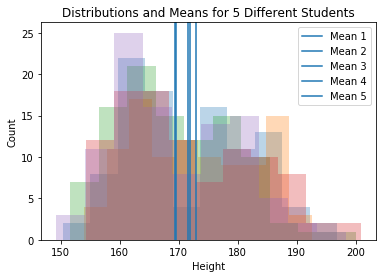

In [12]:
# the metaphor we use is that each student in the room is a grad student
# in our example each student gets a sample of size 100 from the full population
n_grad_students = 5
n_samples_per_student = 100

sample_mat = np.zeros((n_grad_students, n_samples_per_student))
for i in range(n_grad_students):
    #get this student's dataset
    sample_mat[i,:] = np.random.choice(us_pop_heights,n_samples_per_student)
    
    plt.hist(sample_mat[i,:],10, alpha=.3)
    plt.axvline(np.mean(sample_mat[i,:]), label="Mean "+str(i+1))
    plt.legend()
    
plt.title("Distributions and Means for 5 Different Students")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

**Question** Are these sampling distributions? [Answer: no]

#### Note
It's not just about explicitly taking values from a larger population. Every time you collect any kind of data you are implicitly taking values from the larger population of values you could have seen instead. See our notes on "The myth of THE data" for more. 

## Variability of the Means, Variances, and Maxes calculated from individual datasets

First, a helper function which is "each of N grad students gets a sample and crunches thier results", Then calling that function and plotting the resulting sampling distributions

In [ ]:
def sample_and_calculate(n_grad_students,n_samples_per_student):
    #allocate space for the results. Each grad student will collect
    #a random sample from the population and using those heights record the
    #statistics below
    each_students_mean = np.zeros(n_grad_students)
    each_students_variance = np.zeros(n_grad_students)
    each_students_max = np.zeros(n_grad_students)
    for i in range(n_grad_students):
        #get this student's dataset
        cur_students_sample = np.random.choice(us_pop_heights,n_samples_per_student)

        #crunch the numbers in this dataset
        each_students_mean[i]=np.mean(cur_students_sample)
        each_students_variance[i]=np.var(cur_students_sample)
        each_students_max[i]=np.max(cur_students_sample)

    return each_students_mean,each_students_variance,each_students_max

In [13]:
np.random.seed(217)

#How many parallel data collections and analyses we get to see.
#This is arbitrary and only affects how smooth our histograms look
n_grad_students = 10000

#How many people each grad student samples. We'll play with this value
n_samples_per_student = 100

each_students_mean,each_students_variance,each_students_max = sample_and_calculate(n_grad_students,n_samples_per_student)

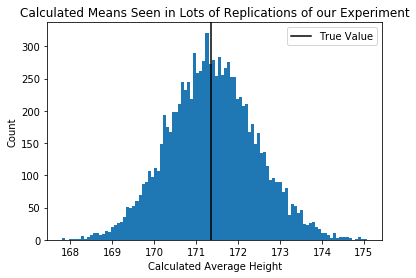

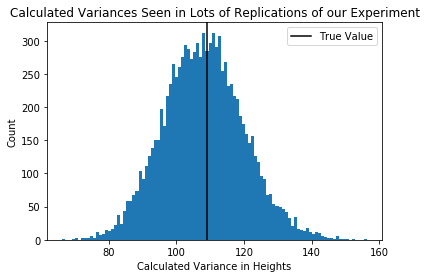

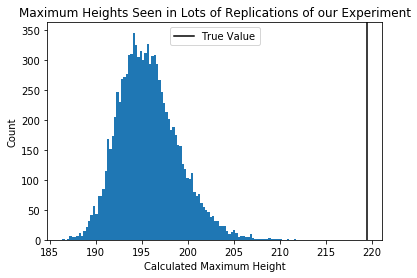

In [14]:
plt.hist(each_students_mean,100)
plt.axvline(true_pop_mean,c='black')
plt.xlabel("Calculated Average Height")
plt.ylabel("Count")
plt.legend(["True Value"])
plt.title("Calculated Means Seen in Lots of Replications of our Experiment")
plt.show()

plt.hist(each_students_variance,100)
plt.axvline(true_pop_variance,c='black')
plt.xlabel("Calculated Variance in Heights")
plt.ylabel("Count")
plt.legend(["True Value"])
plt.title("Calculated Variances Seen in Lots of Replications of our Experiment")
plt.show()

plt.hist(each_students_max,100)
plt.axvline(true_pop_max,c='black')
plt.title("Maximum Heights Seen in Lots of Replications of our Experiment")
plt.xlabel("Calculated Maximum Height")
plt.ylabel("Count")
plt.legend(["True Value"])
plt.show()

**Question** Are these sampling distributions? [Yes, they are]

## Sampling Distibutions as Sample Size Varies

Let's look at the above distribution of likely means/variances/maxes as the sample size increases.

In the plot below, the sample size above appears in orange.

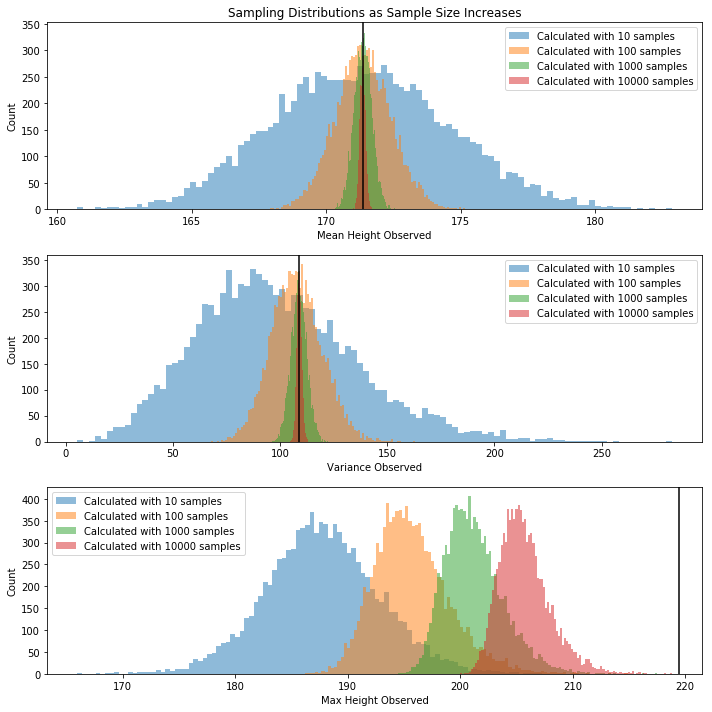

In [15]:
n_grad_students=10000
plotted_sample_sizes=[10,100,1000,10000]

#set up plots
f, ax = plt.subplots(3,1, figsize=(10,10))

#loop
for cur_n_samples in plotted_sample_sizes:
    
    #each of 10K grad student samples cur_n_samples many heights 
    #and calculates mean, variance, and max on thier dataset
    each_students_mean, each_students_variance, each_students_max = sample_and_calculate(n_grad_students,cur_n_samples)
    
    #plot histograms for this sample size    
    ax[0].hist(each_students_mean, 100, alpha=0.5);
    ax[1].hist(each_students_variance, 100, alpha=0.5);
    ax[2].hist(each_students_max, 100, alpha=0.5);

#label the plots
ax[0].set_title("Sampling Distributions as Sample Size Increases")
for i,word in zip(range(3),["Mean Height","Variance","Max Height"]):
    ax[i].set_xlabel(word+ " Observed")
    ax[i].set_ylabel("Count")
    ax[i].legend(["Calculated with "+str(x)+" samples" for x in plotted_sample_sizes])

#lines at the true values 
ax[0].axvline(true_pop_mean,c='black')
ax[1].axvline(true_pop_variance,c='black')
ax[2].axvline(true_pop_max,c='black')
plt.tight_layout()

plt.show()

The distribution of possible means and variances close in on the true value, but the distribution of possible maxes does not.

**Question** What property of mean and varaiance makes them so well-behaved? They're both defined as expected values. More on this throughout the course.


# SUMMARY
 - Anything calculated from a dataset can vary and should carry a +/- with it. If you tried to measure it again, what would you get?
 - Calculations that are expectations or sums behave well becuase of the LLN and CLT. 
 - You are always sitting in a room of other students copying your procedure. What numbers are they getting?

## Bootstrap
Okay, we have to accept that the mean (or any other quantity) we calculate from the data is but one of many possible values. We'd like to get a sense of how much the observed mean varies from dataset to dataset.

Of course, we don't have the actual data-generating process like above, we've just got a sample. Let's set that sample now.

This is my sample: there are many like it, but this one is mine. [Hopefully that phrase has a whole new meaning for you now]

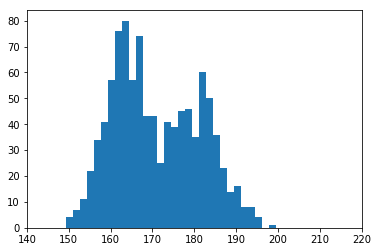

In [13]:
# get a particular sample, size 1000 [100 is so small that it's hard to ballpark the two-gaussian model]
dataset = np.random.choice(us_pop_heights, size=1000)

plt.hist(dataset,30)
plt.xlim(140,220)
plt.show()

For reference, this is what the real distribution looks like:

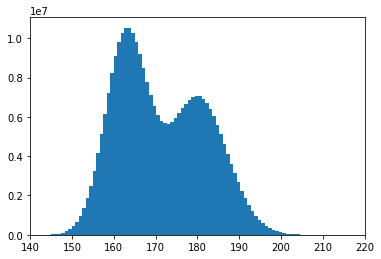

In [24]:
plt.hist(us_pop_heights,100)
plt.xlim(140,220)
plt.show()

### Parametric bootstrap
Well, we don't have the pretty picture above, and we don't have the true data-generating process. So we have to make the best guess we can from the rough sketch.

Eyeballing from the rough histogram, let's say it's two gaussians: one $Normal(180,6)$, and one $Normal(165,5)$, and let's say we use one 50% of the time, and the other one the other 50%.

You can fight amongst yourselves about how to divine the right form of model or get the parameter setting _just_ right. In fact, there are two full graduate courses on that topic.

Now we make the big assumption: The model and the parameters are exactly right. If that's the case, generating a value from the process above is exactly like generating a value via the real process. In particular, we can generate thousands of datasets of a given size and see how variable the calculated means/varainces/maxes are.

In practice, though, we won't have the dials exactly tuned, and we won't have the exact right model.

What if we want to relax those assumptions?

### Non-Parametric bootstrap

Remember this pciture?

![](2017/wiki/images/gaussmle.png)

We said the blue curve with lambda=1.8 makes the data more likely than the green curve (lambda=5.8). But both of those are limiting ourselves to curves with various labda values. What distribution makes the observed data [1,2,3] as likely as possible?

Answer: 1/3 chance of 1, 1/3 chance of 2, 1/3 chance of 3.

What distribution makes the data [4,4,8] as likely as possible?

Answer: 2/3 chance of 4, 1/3 chance of 8.

The MLE distribution, if we don't restrict to a particular form, just weights each point as often as it appears in the data. A sample from this MLE distribution would just pick a row at random from the data.

#### Another view
We want to assume as little as possible about the data-generating process. What do we know about it? ...Well, it generated the data.

Therefore, to produce a new sample from our assumption-free model, we should produce one row of the dataset. To do anything else would be to assume that the DGP could produce values we haven't seen.

#### Overall
- If we want to assume nothing about the data generating process the way we get a sample value is to draw at random from the given rows.
  - If we want another sample, we draw at random again
  - Net: we sample rows at random with replacement, and get the best assumption-free sample we can get from the true data generating process

## Variation in the Bootstrap

But wait! You should be shouting at me: how much does the bootstrap SE depend on our particular sample?!?
Here are 5 different people's bootstrap samples:



In [15]:
#full bootstrap distribution
def get_bootstrap(dataset, num_bootstraps=1000):
    
    dataset_size = dataset.shape[0]

    bootstrap_means = np.zeros(num_bootstraps)
    bootstrap_vars = np.zeros(num_bootstraps)
    bootstrap_maxs = np.zeros(num_bootstraps)

    for bootstrap_rep in range(num_bootstraps):
        bootstrap_sample = np.random.choice(dataset, dataset_size, replace=True)

        bootstrap_means[bootstrap_rep] = np.mean(bootstrap_sample)
        bootstrap_vars[bootstrap_rep] = np.var(bootstrap_sample)
        bootstrap_maxs[bootstrap_rep]=np.max(bootstrap_sample)
    
    return bootstrap_means, bootstrap_vars, bootstrap_maxs

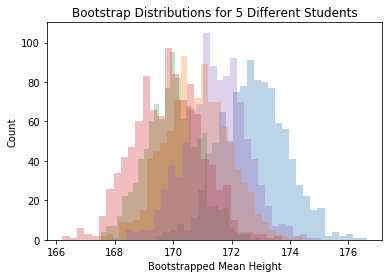

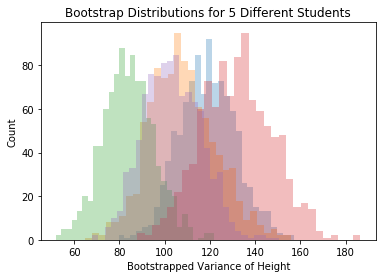

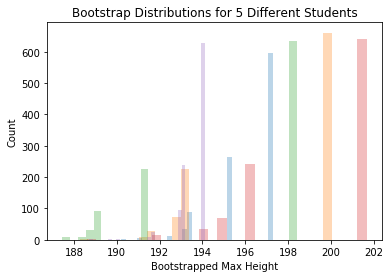

In [16]:
# how different are your bootstrap distributions if you use different samples

num_grad_students = 5
n_samples_per_student = 100
num_bootstraps = 1000

#allocate storage
bootstrap_means_datasets = np.zeros((num_grad_students, num_bootstraps))
bootstrap_vars_datasets = np.zeros((num_grad_students, num_bootstraps))
bootstrap_maxs_datasets = np.zeros((num_grad_students, num_bootstraps))

for i in range(num_grad_students):
    #get this student's dataset
    cur_students_sample = np.random.choice(us_pop_heights,n_samples_per_student)
    
    bootstrap_means, bootstrap_vars, bootstrap_maxs = get_bootstrap(cur_students_sample, num_bootstraps=1000)
    
    bootstrap_means_datasets[i,:] = bootstrap_means
    bootstrap_vars_datasets[i,:] = bootstrap_vars
    bootstrap_maxs_datasets[i,:] = bootstrap_maxs
    
for i in range(num_grad_students):
    plt.hist(bootstrap_means_datasets[i,],30, alpha=.3)
    
plt.title("Bootstrap Distributions for 5 Different Students")
plt.xlabel("Bootstrapped Mean Height")
plt.ylabel("Count")
plt.show()

for i in range(num_grad_students):
    plt.hist(bootstrap_vars_datasets[i,],30, alpha=.3)
    
plt.title("Bootstrap Distributions for 5 Different Students")
plt.xlabel("Bootstrapped Variance of Height")
plt.ylabel("Count")
plt.show()


for i in range(num_grad_students):
    plt.hist(bootstrap_maxs_datasets[i,],30, alpha=.3)
    
plt.title("Bootstrap Distributions for 5 Different Students")
plt.xlabel("Bootstrapped Max Height")
plt.ylabel("Count")
plt.show()

Each student sees the bootstrap distribution centered at a differnt place, but the spread is about the same for each person. The SE we find by building a bootstrap distribution is rather reliable.

In [31]:
#helper to do a bootstrapping and report an SE value. 

def get_se_via_bootstrap(dataset, num_bootstraps=1000):
    dataset_size=dataset.shape[0]
    
    bootstrap_means = np.zeros(num_bootstraps)
    bootstrap_vars = np.zeros(num_bootstraps)
    bootstrap_maxs = np.zeros(num_bootstraps)

    for bootstrap_rep in range(num_bootstraps):
        bootstrap_sample = np.random.choice(dataset, dataset_size, replace=True)

        bootstrap_means[bootstrap_rep] = np.mean(bootstrap_sample)
        bootstrap_vars[bootstrap_rep] = np.var(bootstrap_sample)
        bootstrap_maxs[bootstrap_rep]=np.max(bootstrap_sample)
    
    #return the specific SE estimates found via bootstrapping this particular dataset
    se_of_mean = np.std(bootstrap_means)
    se_of_var = np.std(bootstrap_vars)
    se_of_max = np.std(bootstrap_maxs)

    return se_of_mean, se_of_var, se_of_max

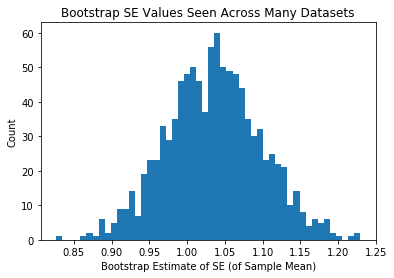

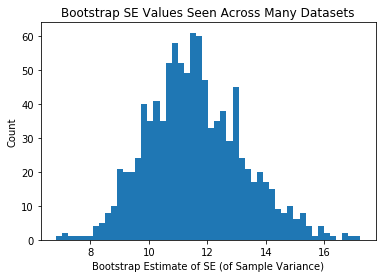

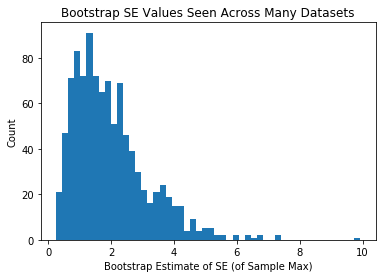

In [35]:
# what range of SE values will you estimate if you commit to bootstrap size = 1,000
# BEFORE EVEN GETTING A SAMPLE
# IE how variable is the SE guess you write down, IN TOTAL?

num_grad_students = 1000
n_samples_per_student = 100
num_bootstraps = 1000

#allocate
se_estiamtes_mean = np.zeros(num_grad_students)
se_estiamtes_var = np.zeros(num_grad_students)
se_estiamtes_max = np.zeros(num_grad_students)
for trial in range(num_grad_students):
    #get a sample from the population
    dataset = np.random.choice(us_pop_heights, n_samples_per_student)
    
    #bootstrap on that sample
    se_of_mean, se_of_var, se_of_max = get_se_via_bootstrap(dataset, num_bootstraps)
    
    #collect the SE observed as one of many possible results
    se_estiamtes_mean[trial] = se_of_mean
    se_estiamtes_var[trial] = se_of_var
    se_estiamtes_max[trial] = se_of_max

plt.hist(se_estiamtes_mean,50)
plt.xlabel("Bootstrap Estimate of SE (of Sample Mean)")
plt.ylabel("Count")
plt.title("Bootstrap SE Values Seen Across Many Datasets")
plt.show()

plt.hist(se_estiamtes_var,50)
plt.xlabel("Bootstrap Estimate of SE (of Sample Variance)")
plt.ylabel("Count")
plt.title("Bootstrap SE Values Seen Across Many Datasets")
plt.show()

plt.hist(se_estiamtes_max,50)
plt.xlabel("Bootstrap Estimate of SE (of Sample Max)")
plt.ylabel("Count")
plt.title("Bootstrap SE Values Seen Across Many Datasets")
plt.show()

## Same as above, but each person in class was given a bigger sample
Ergo, the means themselves are less variable, and the +/- we attach via bootstrapping is less variable.

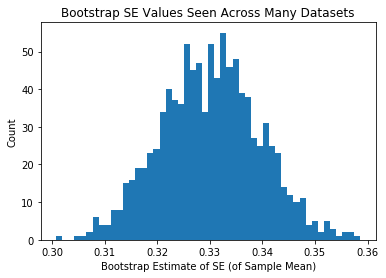

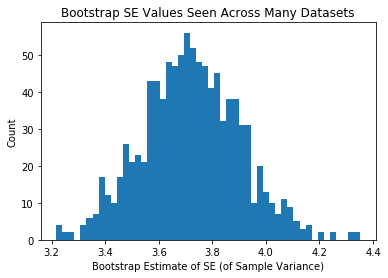

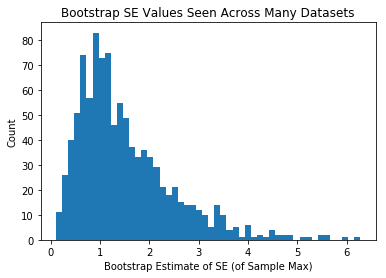

In [34]:
# what range of SE values will you estimate if you commit to bootstrap size = 1,000
# BEFORE EVEN GETTING A SAMPLE
# IE how variable is the SE guess you write down, IN TOTAL?

num_grad_students = 1000
n_samples_per_student = 1000 #this is bigger now
num_bootstraps = 1000

se_estiamtes_mean = np.zeros(num_grad_students)
se_estiamtes_var = np.zeros(num_grad_students)
se_estiamtes_max = np.zeros(num_grad_students)
for trial in range(num_grad_students):
    dataset = np.random.choice(us_pop_heights, n_samples_per_student)
    se_of_mean, se_of_var, se_of_max = get_se_via_bootstrap(dataset, num_bootstraps)

    se_estiamtes_mean[trial] = se_of_mean
    se_estiamtes_var[trial] = se_of_var
    se_estiamtes_max[trial] = se_of_max

plt.hist(se_estiamtes_mean,50)
plt.xlabel("Bootstrap Estimate of SE (of Sample Mean)")
plt.ylabel("Count")
plt.title("Bootstrap SE Values Seen Across Many Datasets")
plt.show()

plt.hist(se_estiamtes_var,50)
plt.xlabel("Bootstrap Estimate of SE (of Sample Variance)")
plt.ylabel("Count")
plt.title("Bootstrap SE Values Seen Across Many Datasets")
plt.show()

plt.hist(se_estiamtes_max,50)
plt.xlabel("Bootstrap Estimate of SE (of Sample Max)")
plt.ylabel("Count")
plt.title("Bootstrap SE Values Seen Across Many Datasets")
plt.show()